In [149]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from sklearn.metrics import auc
matplotlib.rcParams.update({'font.size': 13})

In [214]:
for g in glob('/Users/alfarrm/Documents/GitHub/data-dependent-smoothing/train/smoothing_code/exps/TTE/RS/*/*'):
    print(g)
    print('fixed_sigma' in g)
rs = np.zeros((10000, 3))
rs_tte = np.zeros((10000, 3))
print(rs[0].shape)

/Users/alfarrm/Documents/GitHub/data-dependent-smoothing/train/smoothing_code/exps/TTE/RS/0.12/fixed_sigma_0.12.txt
True
/Users/alfarrm/Documents/GitHub/data-dependent-smoothing/train/smoothing_code/exps/TTE/RS/0.12/flip_crpp_flipped_crop_0.12.txt
False
/Users/alfarrm/Documents/GitHub/data-dependent-smoothing/train/smoothing_code/exps/TTE/RS/0.25/fixed_sigma_0.25.txt
True
/Users/alfarrm/Documents/GitHub/data-dependent-smoothing/train/smoothing_code/exps/TTE/RS/0.25/flip_crpp_flipped_crop_0.25.txt
False
/Users/alfarrm/Documents/GitHub/data-dependent-smoothing/train/smoothing_code/exps/TTE/RS/0.5/fixed_sigma_0.5.txt
True
/Users/alfarrm/Documents/GitHub/data-dependent-smoothing/train/smoothing_code/exps/TTE/RS/0.5/flip_crpp_flipped_crop_0.5.txt
False
(3,)


In [268]:
# legends = []
rs = np.zeros((3, 10000))
# rs_tte = np.zeros((3, 10000))
i = 0
path = '/Users/alfarrm/Documents/GitHub/data-dependent-smoothing/train/smoothing_code/exps/TTE/adv_smooth/*/fi*'
for g in glob(path):
    # legends.append(('Cohen-0.50') if 'fixed_sigma' in g else ('Cohen+SGV'))
    f = open(str(g), "r")
    radius, correct = [], []
    count = 0

    for line in f:
        if count > 0:
            _,_,_,c,d,_,_ = line.split('\t')
            radius.append(float(c))
            correct.append(int(d))
        count += 1
    print(count)
    rad = np.array(radius)*np.array(correct)
    print(rad)
    rs[i] = rad
    i += 1
    

10001
[0.381   0.457   0.457   ... 0.457   0.00709 0.457  ]
10001
[0.8   0.953 0.273 ... 0.953 0.    0.869]
10001
[0.539 1.52  1.06  ... 1.2   0.    1.47 ]


In [269]:
rs.max()

1.91

In [270]:
rad_rs = np.max(rs, 0)
rad_tte = np.max(rs_tte, 0)
cer_rs = []
cer_tte = []
axs = np.linspace(0, 2.0 + 0.01, 10000)
for r in axs:
    cer_rs.append((rad_rs > r).sum())
    cer_tte.append((rad_tte > r).sum())

cer_fixed = np.array(cer_rs)/10000
cer_sgv = np.array(cer_tte)/10000

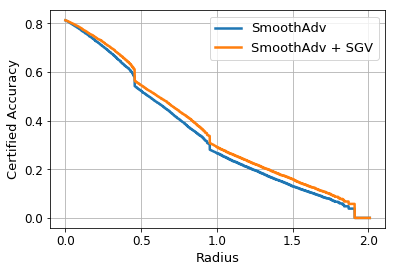

In [271]:
plt.plot(axs, cer_fixed, linewidth=2.5)
plt.plot(axs, cer_sgv, linewidth=2.5)
plt.grid()
plt.xlabel('Radius')
plt.ylabel('Certified Accuracy')
plt.legend(['SmoothAdv', 'SmoothAdv + SGV'], prop={'size': 13})
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('./SmoothAdv_envelop.png', bbox_inches='tight', dpi=400)

In [258]:
def plot_cert(path,name,title):
    legends = []
    for g in glob(path):
        legends.append(('SmoothAdv-0.5') if 'fixed_sigma' in g else ('SmoothAdv+SGV'))
        f = open(str(g), "r")
        radius, correct = [], []
        count = 0

        for line in f:
            if count > 0:
                _,_,_,c,d,_,_ = line.split('\t')
                radius.append(float(c))
                correct.append(int(d))
            count += 1
        print(count)
        rad = np.array(radius)*np.array(correct)
        axs = np.linspace(0, max(radius) + 0.02, 1000)
        cer = []
        for r in axs:
            cer.append((rad > r).sum())
        cer = np.array(cer)/len(rad)
        area = rad.mean()
        legends[-1] += ' ACR = ' + str(round(area, 3))
        plt.plot(axs,cer, linewidth=2.5)
    plt.xlabel('Radius')
    plt.ylabel('Certified Accuracy')
    
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(legends, prop={'size': 13})
    # plt.title(title)
    plt.grid()
    plt.savefig('./certified_acc'+name+'.png', bbox_inches='tight', dpi=400)
    plt.show()
    # plt.close()

10001
10001


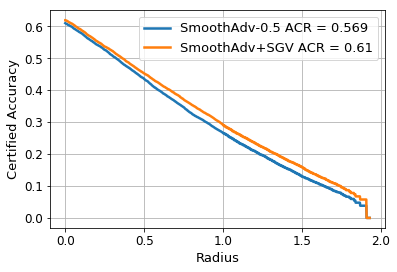

In [259]:
path = '/Users/alfarrm/Documents/GitHub/data-dependent-smoothing/train/smoothing_code/exps/TTE/adv_smooth/sigma_0.5/*'
title = 'SmoothAdv Versus SmoothAdv+TTE at sigma=0.5'
name = 'SmoothAdv Versus SmoothAdv+TTE at sigma=0.5'
plot_cert(path, name, title)

In [35]:
for g in glob('experiments/experiments/pred_smoothing/clustr_only/*/samples4'):
    print(g[-16:])
    title = g[-16:-9] + '_' + g[-8:]
    name = g[-16:-9] + '_' + g[-8:]
    plot_cert(g+'/*', name, title)

sig_0.1/samples4
experiments/experiments/pred_smoothing/clustr_only/smoothed_sig_0.1/samples4/sigma_0.1.txt
experiments/experiments/pred_smoothing/clustr_only/smoothed_sig_0.1/samples4/sigma_0.2.txt
experiments/experiments/pred_smoothing/clustr_only/smoothed_sig_0.1/samples4/sigma_0.3.txt
experiments/experiments/pred_smoothing/clustr_only/smoothed_sig_0.1/samples4/sigma_0.4.txt
experiments/experiments/pred_smoothing/clustr_only/smoothed_sig_0.1/samples4/sigma_0.5.txt
experiments/experiments/pred_smoothing/clustr_only/smoothed_sig_0.1/samples4/sigma_0.6.txt
experiments/experiments/pred_smoothing/clustr_only/smoothed_sig_0.1/samples4/sigma_0.7.txt
experiments/experiments/pred_smoothing/clustr_only/smoothed_sig_0.1/samples4/sigma_0.8.txt
experiments/experiments/pred_smoothing/clustr_only/smoothed_sig_0.1/samples4/sigma_0.9.txt
sig_0.2/samples4
experiments/experiments/pred_smoothing/clustr_only/smoothed_sig_0.2/samples4/sigma_0.1.txt
experiments/experiments/pred_smoothing/clustr_only/smoot

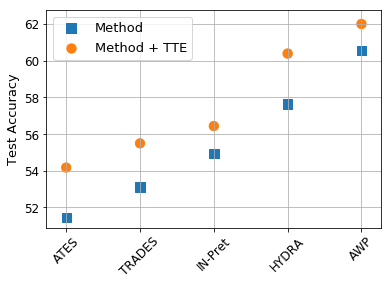

In [171]:
x = ['ATES', 'TRADES', 'IN-Pret', 'HYDRA', 'AWP']
y1 = [51.46, 53.11, 54.92, 57.64, 60.53]
y2 = [54.17, 55.49, 56.43, 60.38, 61.99]

size_1 = [86.84, 84.92, 87.11, 88.98, 88.25]
size_2 = [86.86, 85.14, 87.13, 88.82, 88.07]

plt.scatter(x, y1, marker='s', s=10*size_1)
plt.scatter(x, y2, marker='o', s=10*size_2)
plt.grid()
plt.ylabel('Test Accuracy')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['Method', 'Method + TTE'], loc='best', prop={'size': 13})
plt.tick_params(axis='x', rotation=45)
plt.savefig('pull.png', bbox_inches='tight')

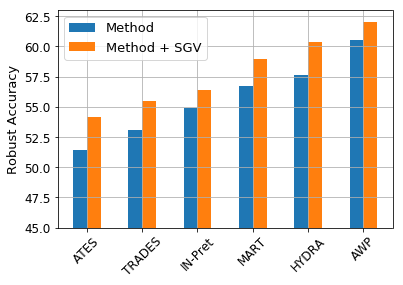

In [274]:
x = ['ATES', 'TRADES', 'IN-Pret', 'MART', 'HYDRA', 'AWP']
y1 = [51.46, 53.11, 54.92, 56.75, 57.64, 60.53]
y2 = [54.17, 55.49, 56.43, 58.94, 60.38, 61.99]

size_1 = [86.84, 84.92, 87.11, 88.98, 88.25]
size_2 = [86.86, 85.14, 87.13, 88.82, 88.07]

plt.bar(x, y1, width=-0.25, align='edge')
plt.bar(x, y2, width=0.25, align='edge' )
plt.grid()
plt.ylabel('Robust Accuracy')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim((45, 63))
plt.legend(['Method', 'Method + SGV'], loc=2, prop={'size': 13})
plt.tick_params(axis='x', rotation=45)
plt.savefig('pull_bars.png', bbox_inches='tight', dpi=400)

In [186]:
plt.legend??

Signature: plt.legend(*args, **kwargs)
Docstring:
Place a legend on the axes.

Call signatures::

    legend()
    legend(labels)
    legend(handles, labels)

The call signatures correspond to three different ways how to use
this method.

**1. Automatic detection of elements to be shown in the legend**

The elements to be added to the legend are automatically determined,
when you do not pass in any extra arguments.

In this case, the labels are taken from the artist. You can specify
them either at artist creation or by calling the
:meth:`~.Artist.set_label` method on the artist::

    line, = ax.plot([1, 2, 3], label='Inline label')
    ax.legend()

or::

    line.set_label('Label via method')
    line, = ax.plot([1, 2, 3])
    ax.legend()

Specific lines can be excluded from the automatic legend element
selection by defining a label starting with an underscore.
This is default for all artists, so calling `Axes.legend` without
any arguments and without setting the labels manually will 